In [85]:
import numpy as np
import pandas as pan
import matplotlib.pyplot as plot
import seaborn as sns

sns.set()

from mlxtend.plotting import plot_decision_regions
import missingno as msno
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

from sklearn.linear_model import LogisticRegression
import joblib

df = pan.read_csv(r'C:\Users\kstre_3ikvnbf\STAT 4360\Mini Project 2\diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
# Perform Exploratory Analysis
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [9]:
df_copy = df.copy(deep = True)
df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

# Showing the Count of NANs
print(df_copy.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


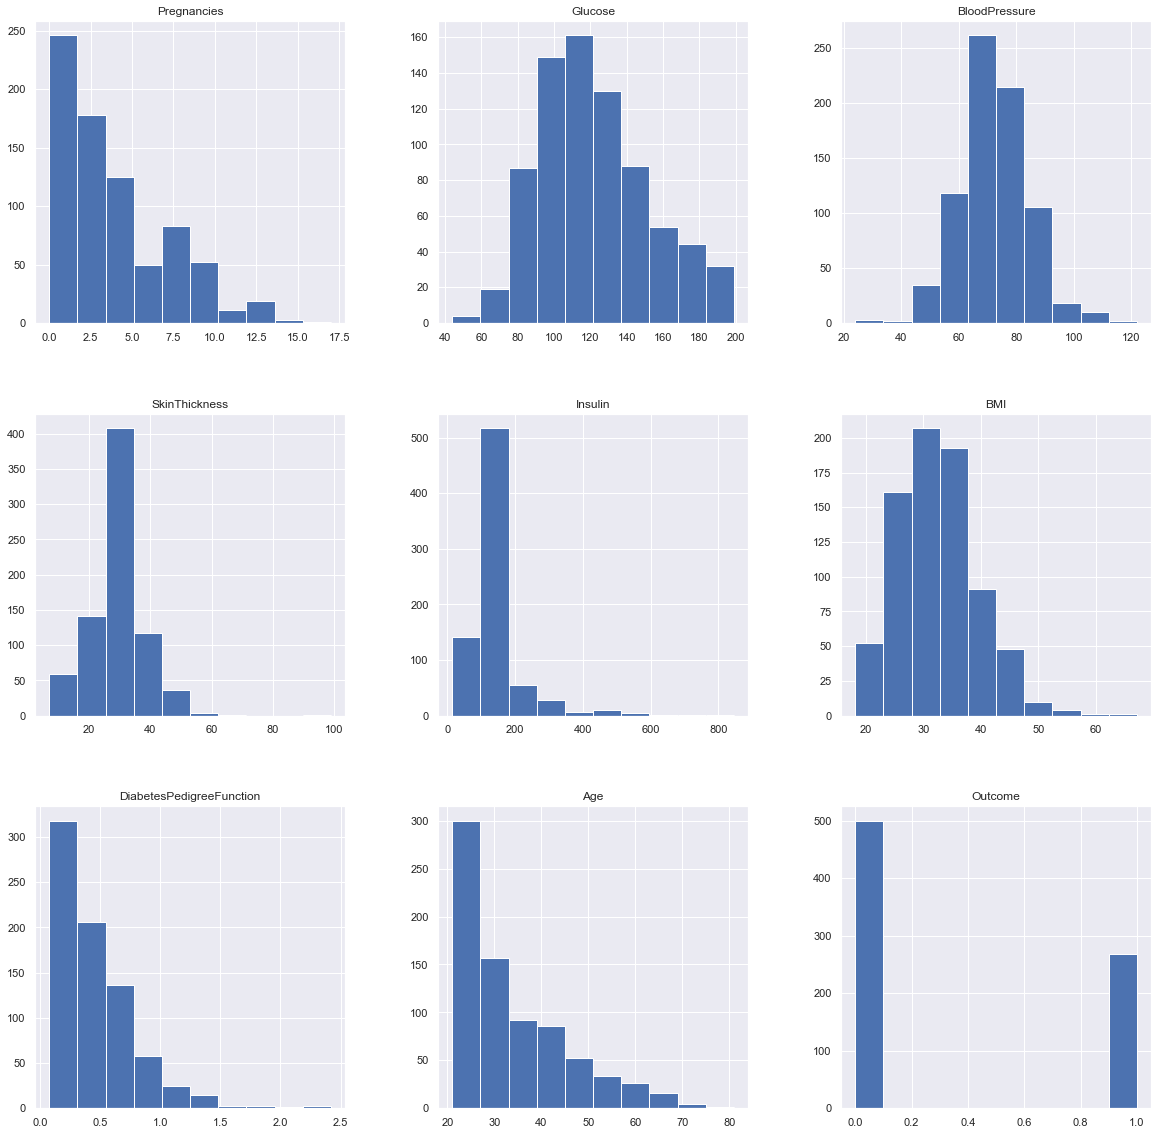

In [12]:
df_copy['Glucose'].fillna(df_copy['Glucose'].mean(), inplace = True)
df_copy['BloodPressure'].fillna(df_copy['BloodPressure'].mean(), inplace = True)
df_copy['SkinThickness'].fillna(df_copy['SkinThickness'].median(), inplace = True)
df_copy['Insulin'].fillna(df_copy['Insulin'].median(), inplace = True)
df_copy['BMI'].fillna(df_copy['BMI'].median(), inplace = True)
p = df_copy.hist(figsize = (20,20))

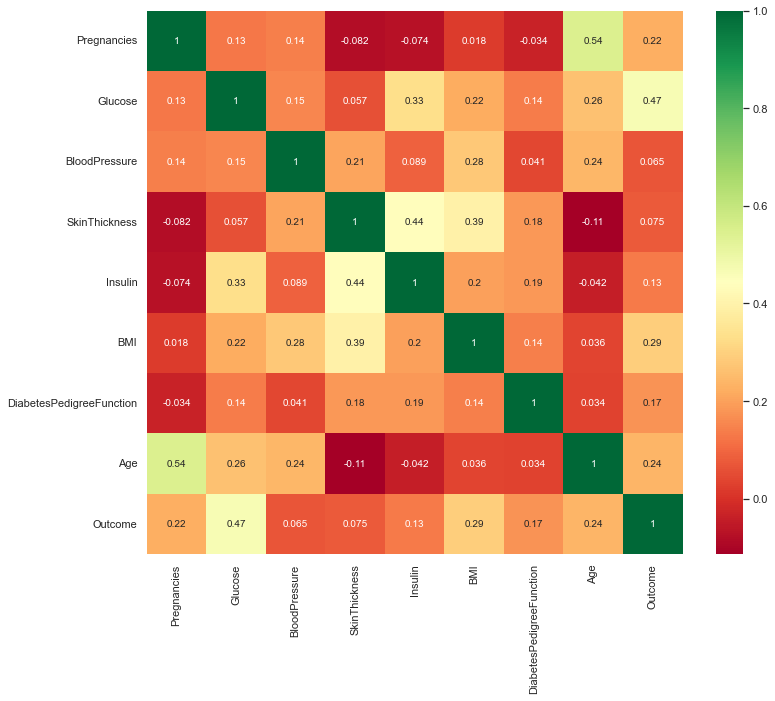

In [15]:
plot.figure(figsize=(12,10))
# Show Correlation Between the Features
p = sns.heatmap(df.corr(), annot=True,cmap ='RdYlGn')

0    500
1    268
Name: Outcome, dtype: int64


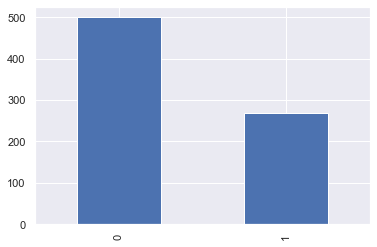

In [24]:
# How Many Are Diabetic?
color_wheel = {1: "#0392cf", 2: "#7bc043"}
colors = df["Outcome"].map(lambda x: color_wheel.get(x + 1))
print(df.Outcome.value_counts())
p=df.Outcome.value_counts().plot(kind="bar")

In [88]:
# Scale Data
sc_X = StandardScaler()
X =  pan.DataFrame(sc_X.fit_transform(df_copy.drop(["Outcome"],axis = 1),), columns=['Pregnancies', 
'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'])
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.865108,-0.033518,0.670643,-0.181541,0.166619,0.468492,1.425995
1,-0.844885,-1.206162,-0.529859,-0.012301,-0.181541,-0.852200,-0.365061,-0.190672
2,1.233880,2.015813,-0.695306,-0.012301,-0.181541,-1.332500,0.604397,-0.105584
3,-0.844885,-1.074652,-0.529859,-0.695245,-0.540642,-0.633881,-0.920763,-1.041549
4,-1.141852,0.503458,-2.680669,0.670643,0.316566,1.549303,5.484909,-0.020496


In [87]:
# Split and Normalize Dataset
dfTrain = df_copy[:650]
dfTest = df_copy[650:750]
dfCheck = df_copy[750:]
trainLabel = np.asarray(dfTrain['Outcome'])
trainData = np.asarray(dfTrain.drop('Outcome',1))
testLabel = np.asarray(dfTest['Outcome'])
testData = np.asarray(dfTest.drop('Outcome',1))
means = np.mean(trainData, axis=0)
stds = np.std(trainData, axis=0)

# Train and Evaluate Model
trainData = (trainData - means)/stds
testData = (testData - means)/stds
diabetesCheck = LogisticRegression()
diabetesCheck.fit(trainData, trainLabel)
accuracy = diabetesCheck.score(testData, testLabel)
print("accuracy = ", accuracy * 100, "%")
# Glucose, BMI, Pregancies, and DPF have Significant Influence

accuracy =  78.0 %


In [90]:
joblib.dump([diabetesCheck, means, stds], 'diabetesModel.pkl')

['diabetesModel.pkl']

In [93]:
sampleData = dfCheck[:1]
# Prepare Sample
sampleDataFeatures = np.asarray(sampleData.drop('Outcome',1))
sampleDataFeatures = (sampleDataFeatures - means)/stds
# Predict
predictionProbability = diabetesLoadedModel.predict_proba(sampleDataFeatures)
prediction = diabetesLoadedModel.predict(sampleDataFeatures)
print('Probability:', predictionProbability)
print('prediction:', prediction)

Probability: [[0.45556159 0.54443841]]
prediction: [1]


In [95]:
# Summary of Model
import statsmodels.api as sm
model = sm.Logit(trainLabel, trainData).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.522615
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  650
Model:                          Logit   Df Residuals:                      642
Method:                           MLE   Df Model:                            7
Date:                Wed, 22 Mar 2023   Pseudo R-squ.:                  0.1873
Time:                        14:12:03   Log-Likelihood:                -339.70
converged:                       True   LL-Null:                       -417.99
Covariance Type:            nonrobust   LLR p-value:                 1.688e-30
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.4345      0.117      3.716      0.000       0.205       0.664
x2             1.1014      0.

In [101]:
# Get Training Error
# X = df.drop('Outcome', axis=1)
y = df['Outcome']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state=7)

from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

from sklearn import metrics
predictions = dtree.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix
confusion = confusion_matrix(y_test, predictions)
print(confusion)
print(classification_report(y_test,predictions))

from sklearn.metrics import mean_squared_error
training_error = mean_squared_error(y_test, predictions)
print("training error: ")
print(training_error)

[[129  33]
 [ 41  51]]
              precision    recall  f1-score   support

           0       0.76      0.80      0.78       162
           1       0.61      0.55      0.58        92

    accuracy                           0.71       254
   macro avg       0.68      0.68      0.68       254
weighted avg       0.70      0.71      0.71       254

training error: 
0.29133858267716534


In [102]:
mis_rate = (confusion[[1],[0]].flat[0] + confusion[[0],[1]].flat[0])/len(y_test)
print(f"Test Error Rate = {mis_rate :.3f}")

Test Error Rate = 0.291
